Group members: Na Qian，Peiyue Yin, Swetha Daddala <br>
Instructor: Fidel Rodriguez <br>
Date: May.12, 2020

**Import Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (21,7)
sns.set_style('whitegrid')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn import tree 
from scipy.stats import f_oneway


In [ ]:
#Acquire data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTxDn1jihXz3534LPgOfWJSpfb3NaRwbyPm37DHtpxGPhdWJ84vhE6cEWapXPyHj9z6fe8J0a1isbFI/pub?gid=827996277&single=true&output=csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Dataset description 
This is a medical cost dataset we found at kaggle. This dataset has 7 columns and 1338 rows. There is non-null data in this dataset.
# Column Definitions:
*   age: age of primary beneficiary


*   sex: insurance contractor gender, female, male


*   bmi: Body mass index(kg / m ^ 2), providing an understanding of body, weights that are relatively high or low relative to height.  A BMI of less than 18.5 means that a person is underweight. A BMI of between 18.5 and 24.9 is ideal. A BMI of between 25 and 29.9 is overweight. A BMI over 30 indicates obesity.

*   children: Number of children covered by health insurance / Number of dependents

*   smoker: Smoking

*   region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

*   charges: Individual medical costs billed by health insurance

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#encoding 
lb = LabelEncoder() 

df['sex_'] = lb.fit_transform(df['sex']) 
df['smoker_'] = lb.fit_transform(df['smoker'] )
df['region_'] = lb.fit_transform(df['region'] )

sex_: female 0, male: 1

smoker_:  no 0, yes 1

region_ : northeast 0, northwest1, southeast2, southwest 3

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_,smoker_,region_
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


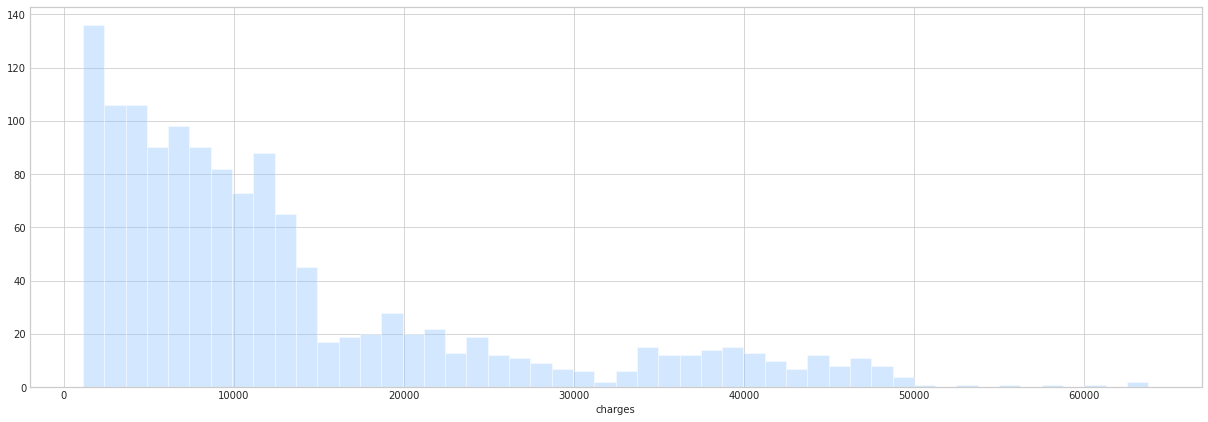

In [ ]:
# distplot to see the distribution of charges
sns.distplot(df['charges'], bins=50,kde=False)

In [ ]:
df['charges'].max()

63770.42801

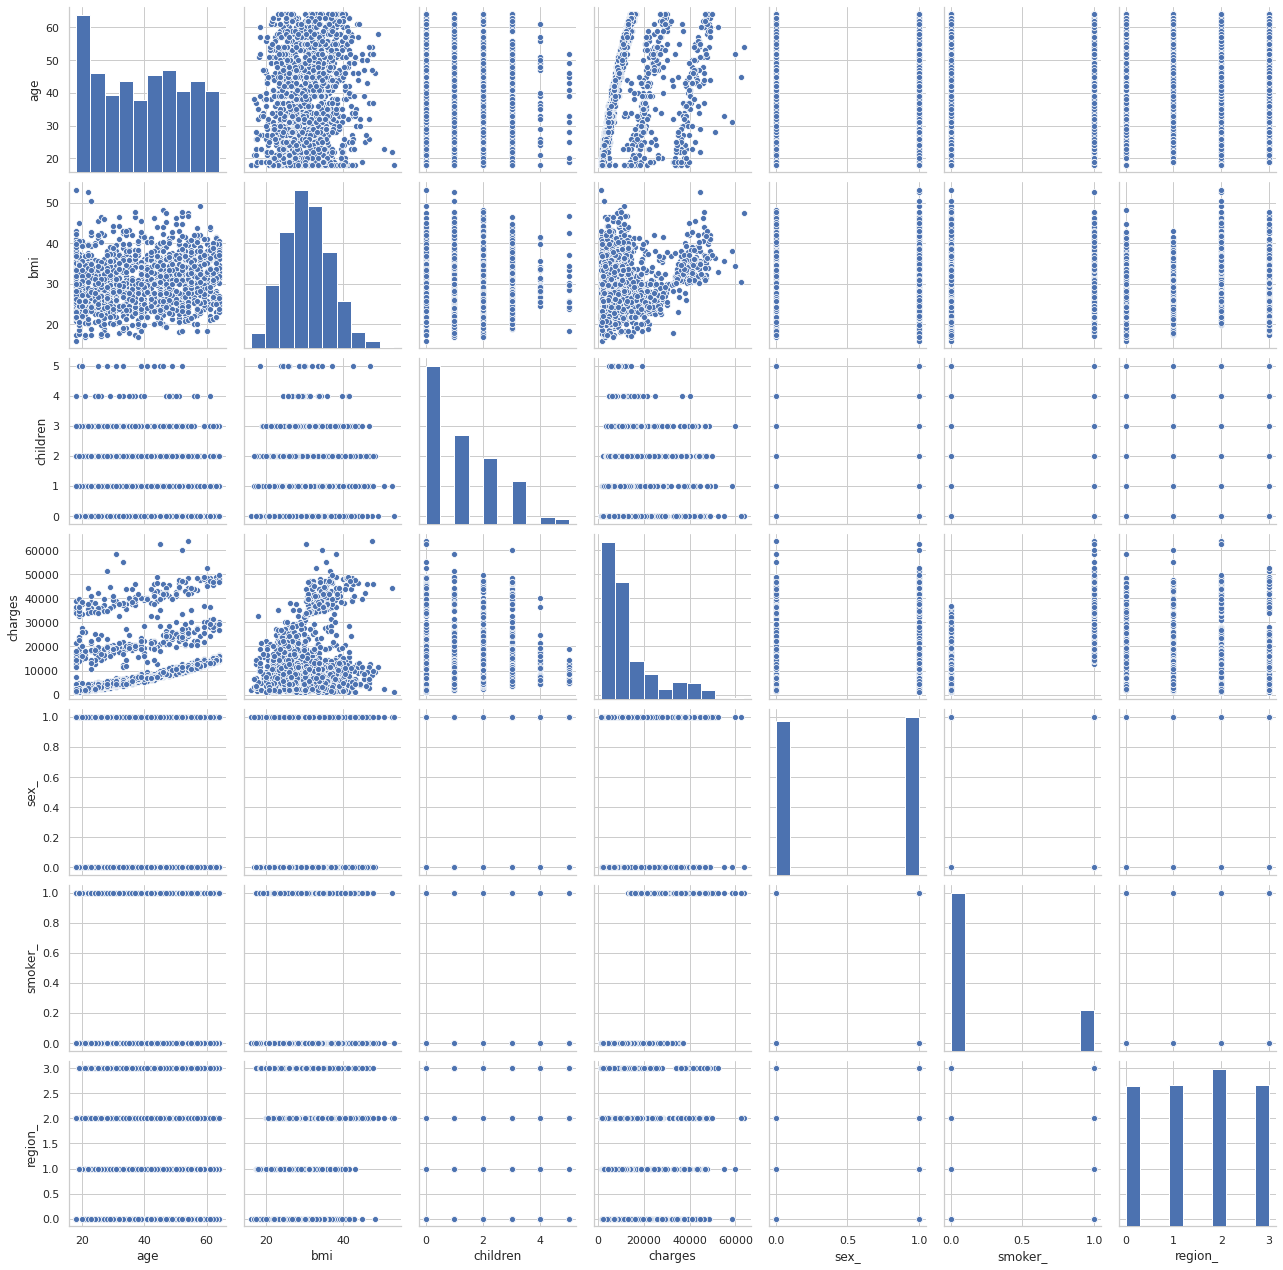

In [ ]:
#pairplot to see the relationship between numerical variables
sns.pairplot(data=df)

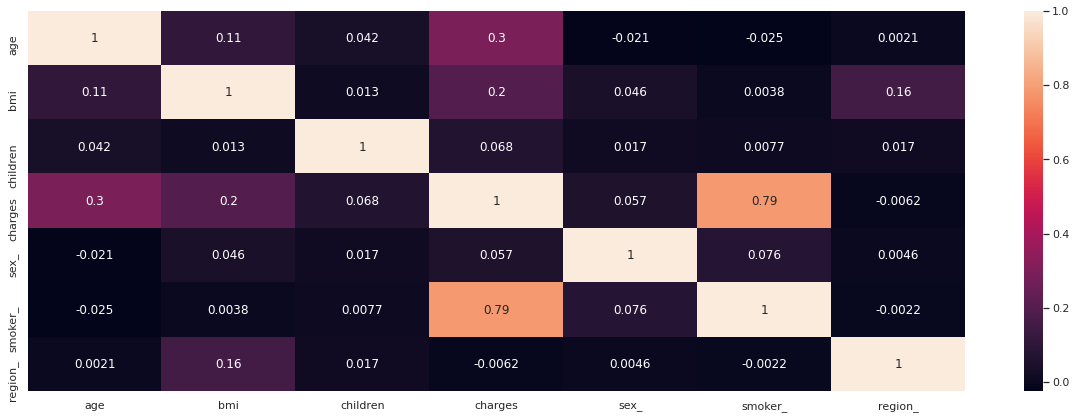

In [ ]:
#heatmap to see the correlation between numerical variables
sns.heatmap(df.corr(),annot=True)

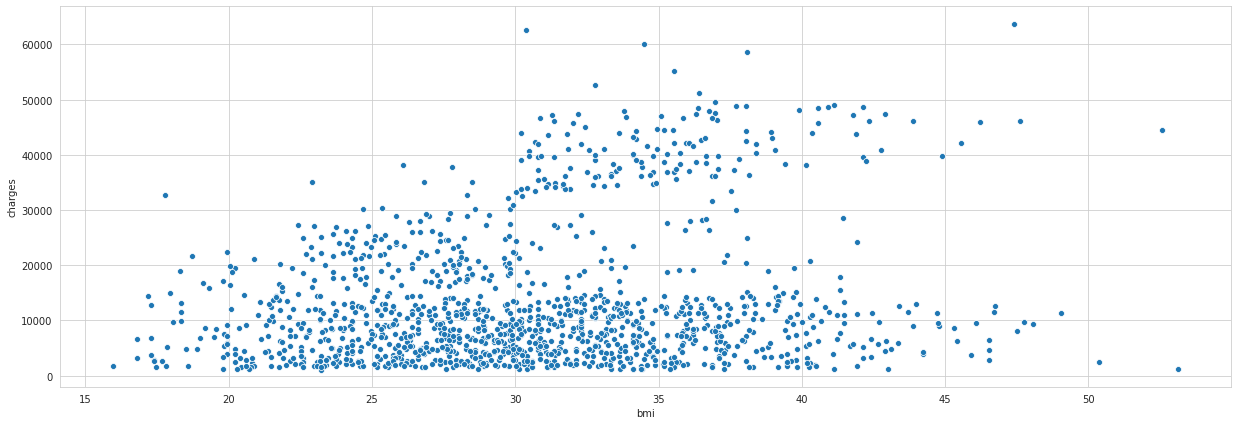

In [ ]:
#scatter plot to see the relationship between charges and bmi
sns.scatterplot(x='bmi',y='charges',data=df)

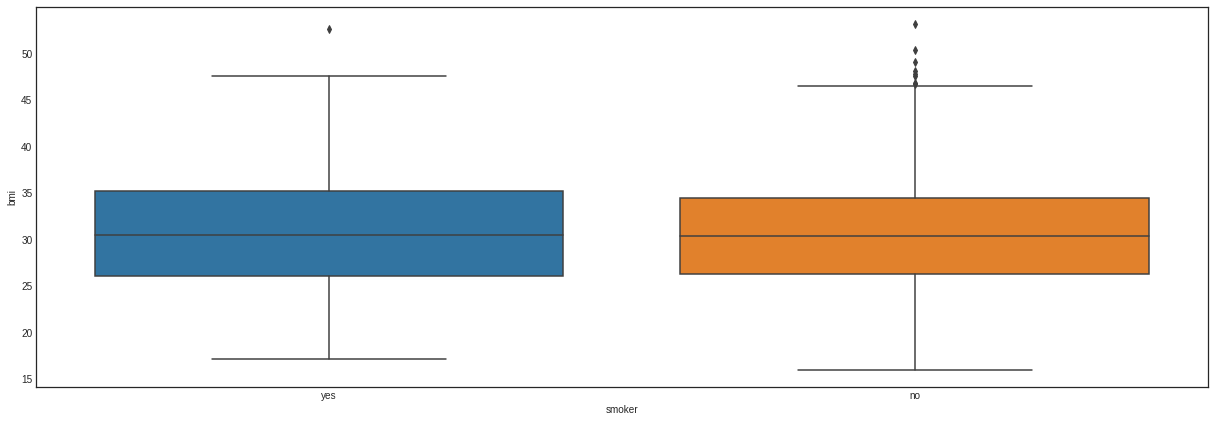

In [ ]:
sns.boxplot(x='smoker',y='bmi',data=df)

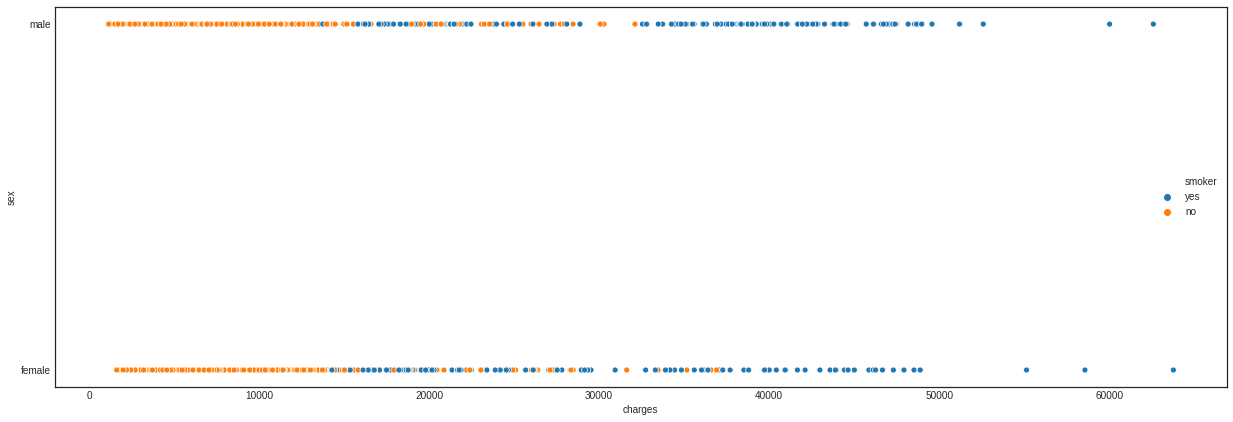

In [ ]:
sns.scatterplot(x='charges',y='sex',data=df,hue='smoker')

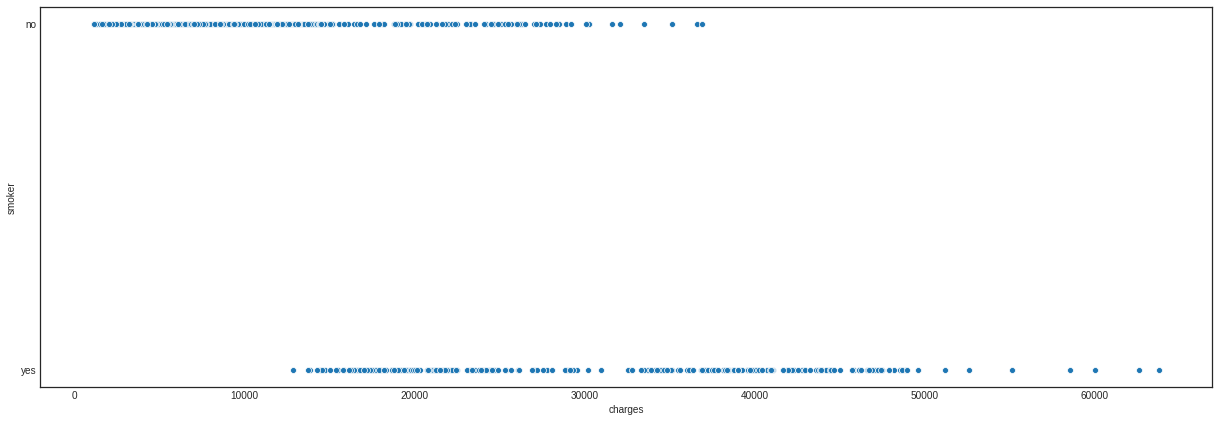

In [ ]:
sns.scatterplot(x='charges',y='smoker',data=df)

(17.0, 66.0)

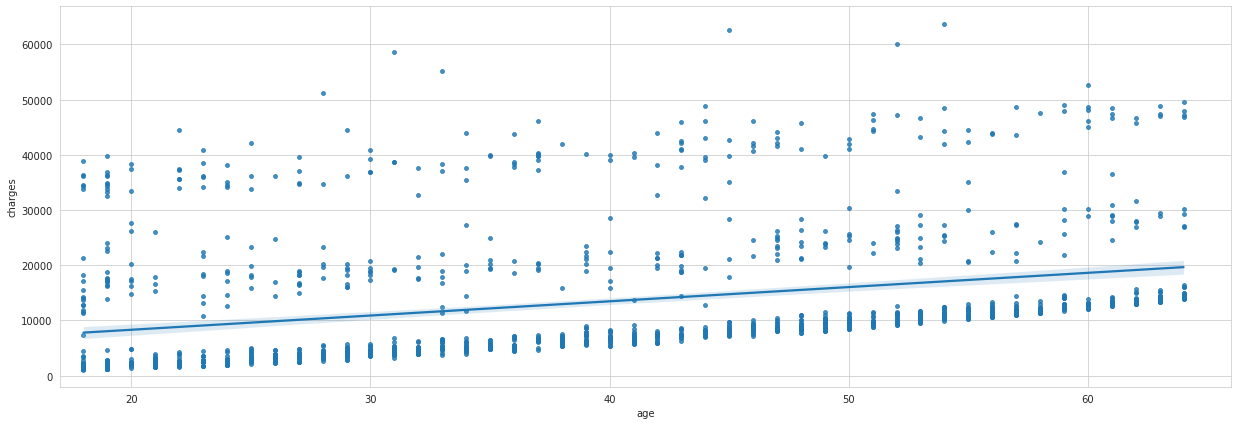

In [ ]:
#sns.scatterplot(x='age',y='charges',data=df)
sns.regplot(x = 'age', y = 'charges', data = df,scatter_kws={'s':15})
plt.xlim([17,66])

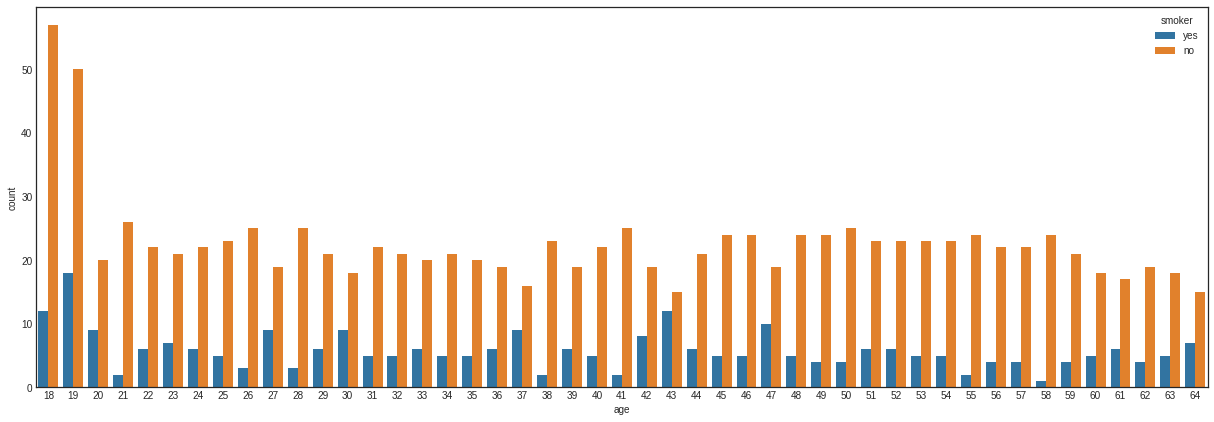

In [ ]:
sns.countplot(x='age',hue='smoker',data=df)

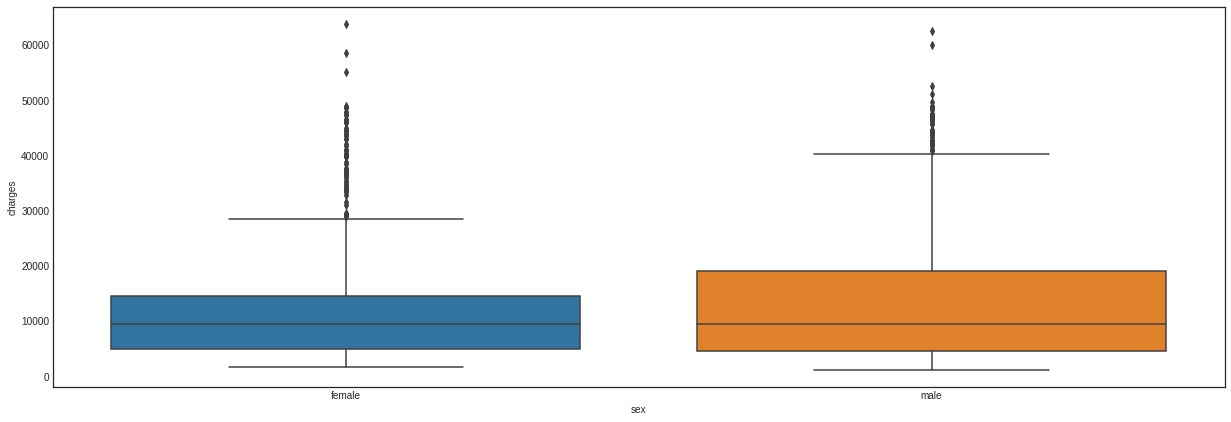

In [ ]:
sns.boxplot(x='sex',y='charges',data=df)

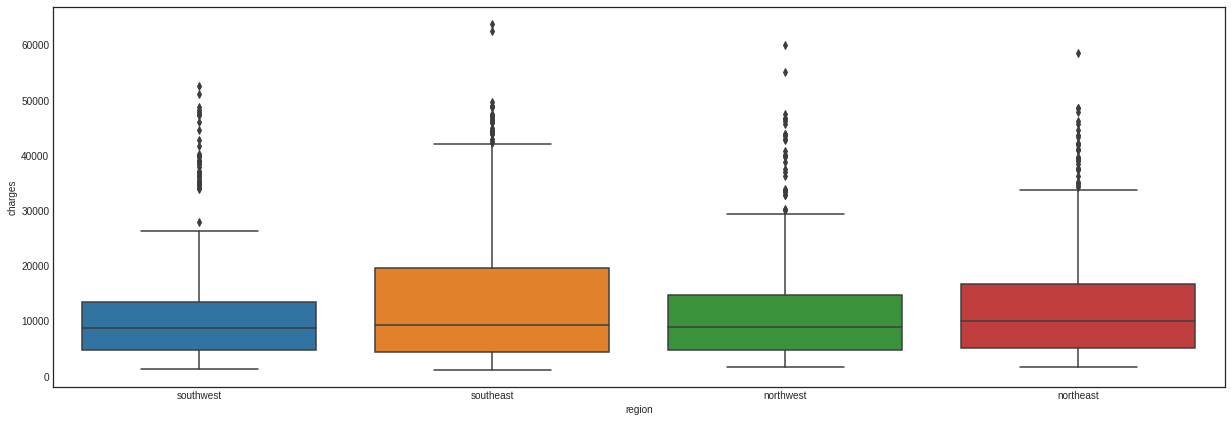

In [ ]:
sns.boxplot(x='region',y='charges',data=df)

# Observation:
1.The medical charge distribution is non-normal and right-skewed which means its mean value will be highly affected by outliers and will significantly vary from its median value. The majority of clients are being charged between 2000  and 13000 USD. 

2.medical charges do not seem to be affected by gender.

3.Smokers tend to pay more on medical charges than non-smokers. 

4.There is no obvious relationship between the medical charge and regions.

5.With the growing of age, the number of clients whose charges is over 10000 is growing. Cliets who are over 50 years old, the lowest charges will over 10000.


# Model selection to predict the charges

# First--Linear Regression model

In [ ]:
X=df[['age','bmi','children','sex_','smoker_','region_']]
y=df['charges']

In [ ]:
lm=LinearRegression()

In [ ]:
#use cross validation to find the mse for linear regression model
scores=cross_val_score(lm,X,y,cv=10,scoring='neg_mean_squared_error')

In [ ]:
print(scores)

[-35845749.24966572 -38432832.61770535 -37058519.89312872
 -38917334.50675832 -38615573.59013647 -26659441.21141334
 -30750715.27147903 -48221182.60302642 -33360406.72451382
 -41712485.33590883]


In [ ]:
# get the mse
mse_scores=-scores

In [ ]:
#get the rmse
rmse_scores=np.sqrt(mse_scores)

In [ ]:
#print the rmse
print(rmse_scores.mean())

6061.3769309835025


# Second--Ridge regression model


In [ ]:
#use GridSearchCv to find the best parameter
#fit our data to ridge regression model
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=10)
ridge_regressor.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
#get the best score
ridge_best_score=ridge_regressor.best_score_

In [ ]:
#print the best score
ridge_best_score

-36957416.75014101

In [ ]:
#get the rmse for ridge regression
ridge_rmse = np.sqrt(-ridge_best_score)

In [ ]:
#print the rmse for ridge regression
ridge_rmse

6079.261201012917

In [ ]:
#print the best parameters
print(ridge_regressor.best_params_)

{'alpha': 0.01}


# Thrid--Lasso Regression model

In [ ]:
#use GridSearchCv to find the best parameter
#fit our data to lasso regression model
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=10)
lasso_regressor.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22045603754.69639, tolerance: 17361265.088620525
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21863387761.2525, tolerance: 17684621.1953036
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21962394085.458473, tolerance: 17729765.201103836
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21838203647

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
#get the best score
lasso_best_score=lasso_regressor.best_score_

In [ ]:
#print the best score
lasso_best_score

-36919700.1180249

In [ ]:
#get the rmse for lasso regression
lasso_rmse=np.sqrt(-lasso_best_score)

In [ ]:
#print the rmse for lasso regression
lasso_rmse

6076.158335496607

In [ ]:
#print the best parameters
print(lasso_regressor.best_params_)

{'alpha': 55}


In [ ]:
#get the coefficients 
lasso=Lasso(alpha=55)
lasso_coef=lasso.fit(X,y).coef_

In [ ]:
#print the coefficients
cdf_lasso=pd.DataFrame(lasso_coef,X.columns,columns=['Coeff'])
print(cdf_lasso)

                 Coeff
age         257.143943
bmi         329.438710
children    440.999395
sex_         -0.000000
smoker_   23471.536528
region_    -305.682317


# Fourth--Do another linear regression without sex column

In [ ]:
X2=df[['age','bmi','children','smoker_','region_']]
y=df['charges']

In [ ]:
#use cross validation to find the mse for linear regression model withour 'sex_' column
scores2=cross_val_score(lm,X2,y,cv=10,scoring='neg_mean_squared_error')

In [ ]:
#get the mse
mse_scores2=-scores2

In [ ]:
#get rmse
rmse_scores2=np.sqrt(mse_scores2)

In [ ]:
#print rmse
print(rmse_scores2.mean())

6055.882093210133


# The fourth model has the lowest rmse, this model will be used to make charges prediction

In [ ]:
X2_train,X2_test,y_train,y_test=train_test_split(X2,y)

In [ ]:
#fit data to linear regression model
lm.fit(X2_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#use model to make predictions
predictions=lm.predict(X2_test)

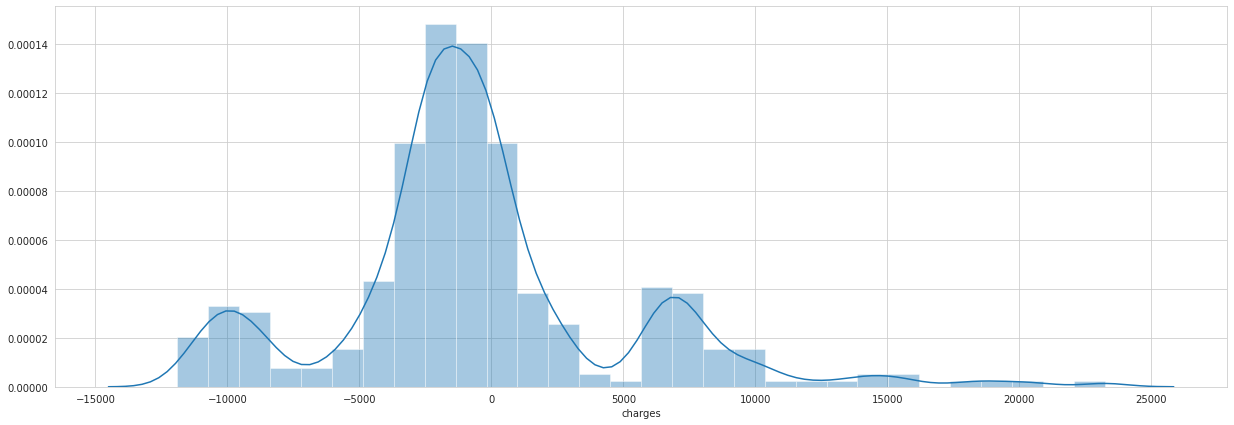

In [ ]:
#plot residual
sns.distplot(y_test-predictions,bins=30)

In [ ]:
#mse
metrics.mean_squared_error(y_test,predictions)

30725949.108780976

In [ ]:
#rmse
np.sqrt(metrics.mean_squared_error(y_test,predictions))

5543.099233171004

In [ ]:
#print R^2
print('Variance Score (R^2):%.2f' % r2_score(y_test, predictions))

Variance Score (R^2):0.78


# Arbitrary value prediction

In [ ]:
#make five arbitrary records
df_arb=pd.DataFrame({'age':[18,20,25,33,50],'bmi':[29.432,22.500,30.438,40.225,42.443],'children':[0,0,1,2,3],'sex_':[1,0,0,1,1],
                     'smoker_':[0,0,1,1,1],'region_':[3,0,1,2,1]})

In [ ]:
#print the five records
df_arb

,age,bmi,children,sex_,smoker_,region_
0,18,29.432,0,1,0,3
1,20,22.500,0,0,0,0
2,25,30.438,1,0,1,1
3,33,40.225,2,1,1,2
4,50,42.443,3,1,1,1


In [ ]:
X_arb=df_arb[['age','bmi','children','smoker_','region_']]

In [ ]:
#fit the data into our selected model
charge_pred=lm.predict(X_arb)

In [ ]:
#charge predictions
charge_pred

array([ 1727.14141826,   664.225407  , 28467.06074311, 34174.29653142,
       40138.28485713])

In [ ]:
charge_pred=pd.DataFrame({'charge_pred':charge_pred})

In [ ]:
#print the charge predictions as dataframe
charge_pred

,charge_pred
0,1727.141418
1,664.225407
2,28467.060743
3,34174.296531
4,40138.284857


Hypothesis Test
=====

*   Null Hypothesis: The distribution of medical charges of clients is the same for smokers and non-smokers. 
*   Alternateive Hypothesis: The distribution of medical charges of clients who smoke have higher medical charge than non-smokers.
*   P-value: 0.05

no     1064
yes     274
Name: smoker, dtype: int64


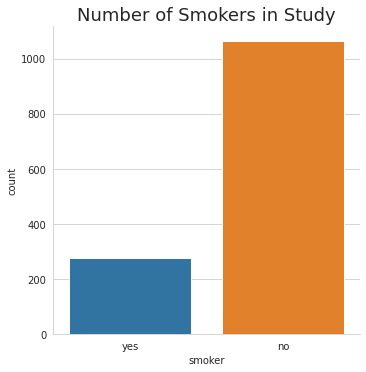

In [ ]:
# Number of smokers in the dataset
sns.catplot(x = 'smoker', data=df, kind='count')
plt.title('Number of Smokers in Study', fontsize = 18)
print(df['smoker'].value_counts())

In [ ]:
# Number of smokers in the dataset
sns.catplot(x ='sex',hue='smoker', data=df, kind="count",height=10,aspect=1.7,legend_out=False)
plt.suptitle('Number of Smokers by Gender', fontsize = 25)
plt.xlabel('Gender')
print(pd.crosstab(df['smoker'],df['sex']))

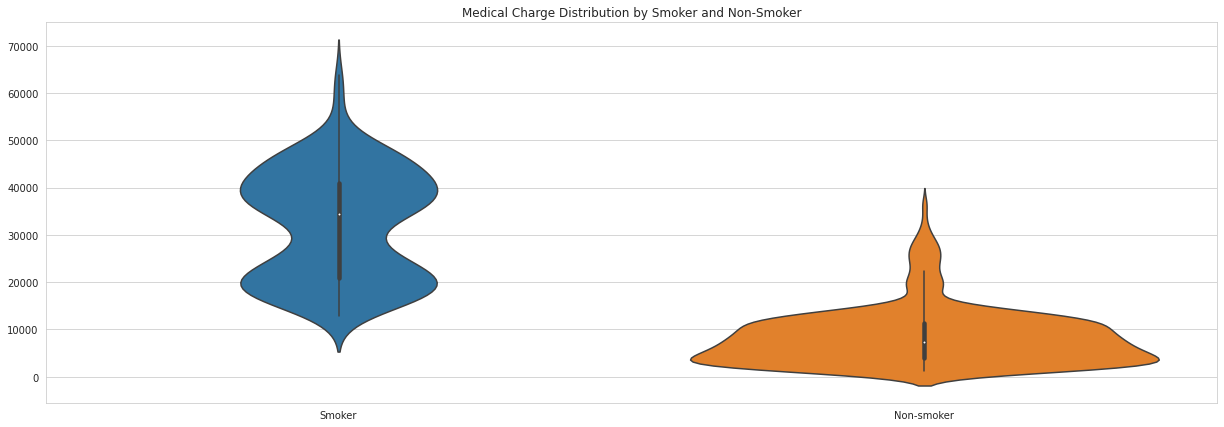

In [ ]:
# Violinplot of Medical Cost by Smoker and Non-smoker
ax = sns.violinplot(x = 'smoker', y = 'charges', data = df)
ax.set(title = 'Medical Charge Distribution by Smoker and Non-Smoker', xlabel='', ylabel='', xticklabels=['Smoker', 'Non-smoker']);

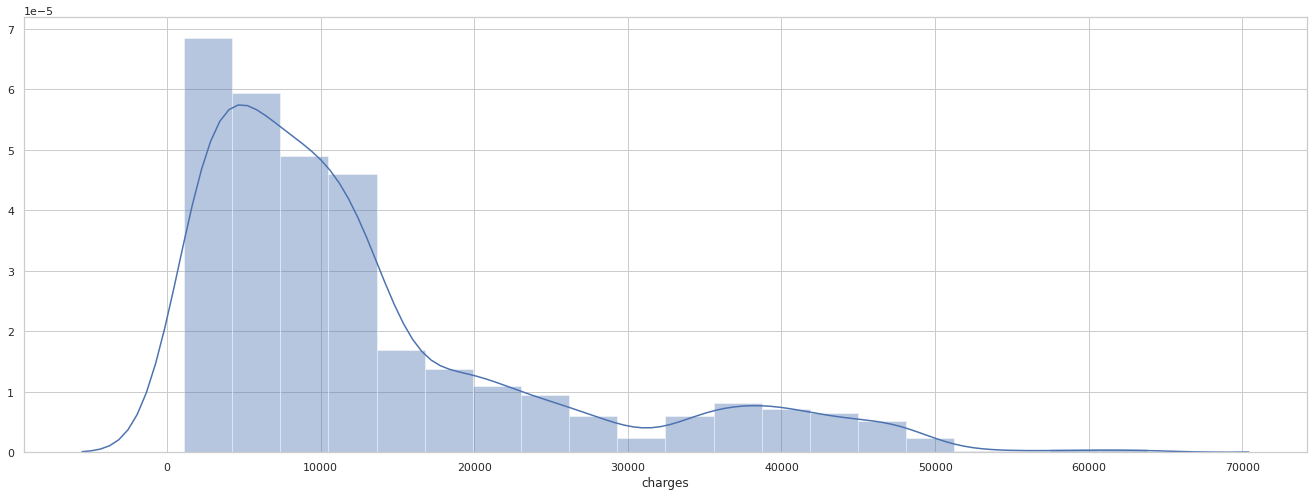

In [ ]:
# Distribution of medical charge
plt.figure(figsize=(23,8))
dist_df = sns.distplot(df['charges'], bins = 20)

In [ ]:
df_smoker = df['charges'].loc[df['smoker']=="yes"]
df_nonsmoker = df['charges'].loc[df['smoker']=="no"]

Text(0.5, 0, 'smoker')

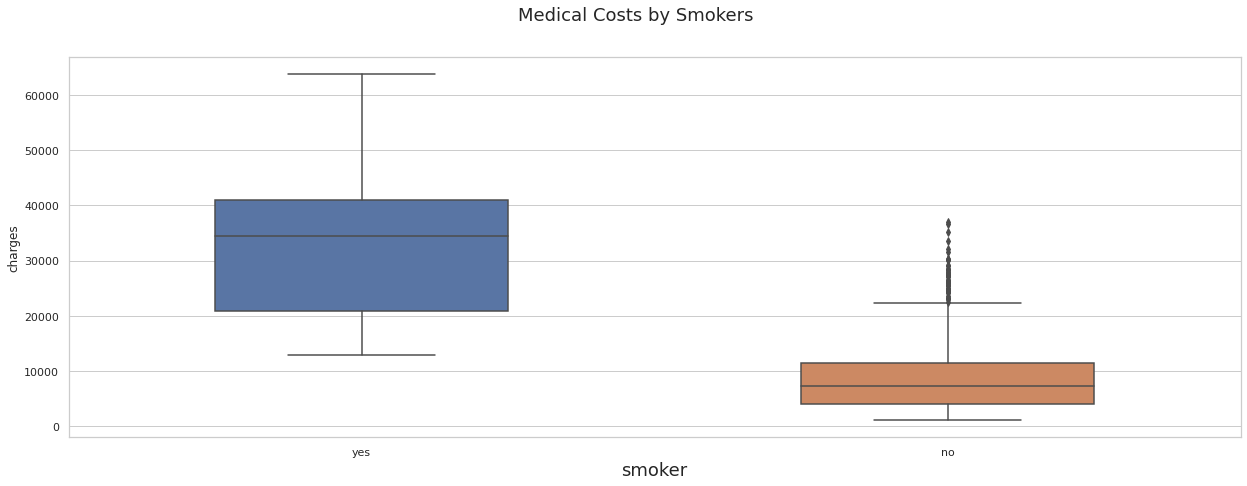

In [ ]:
sns.boxplot(x = "smoker", y = "charges", data=df, width=0.5)
plt.suptitle('Medical Costs by Smokers', fontsize = 18)
plt.xlabel('smoker', fontsize = 18)

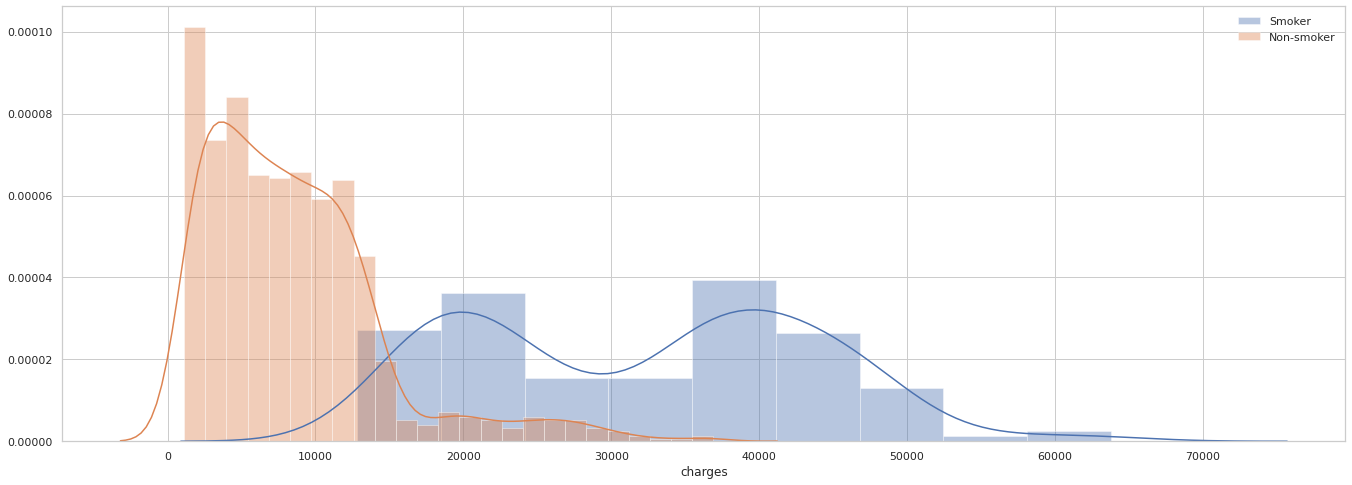

In [ ]:
# Plot medical charge distribution by smoker and non-smoker
sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
dist_df_smoker = sns.distplot(df_smoker, hist=True)
dist_df_nonsmoker = sns.distplot(df_nonsmoker, hist=True)
plt.legend(['Smoker','Non-smoker'])

In [ ]:
# Compare samples
stat, p = f_oneway(df_smoker, df_nonsmoker)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=2177.615, p=0.000
Different distributions (reject H0)


# Logistic regression to predict smoker and non-smoker

In [ ]:
X=df[['age','bmi','children','charges','sex_','region_']]
y=df['smoker_']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101)

In [ ]:
#fit data into logistic regression model
#make predictions
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)
predictions=logmodel.predict(X_test)

In [ ]:
#print classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       276
           1       0.78      0.76      0.77        59

    accuracy                           0.92       335
   macro avg       0.86      0.86      0.86       335
weighted avg       0.92      0.92      0.92       335



In [ ]:
#print confusion matrix
con_max_logistic = confusion_matrix(y_test,predictions)
con_max_logistic

array([[263,  13],
       [ 14,  45]])

Text(0.5, 33.0, 'Predicted label')

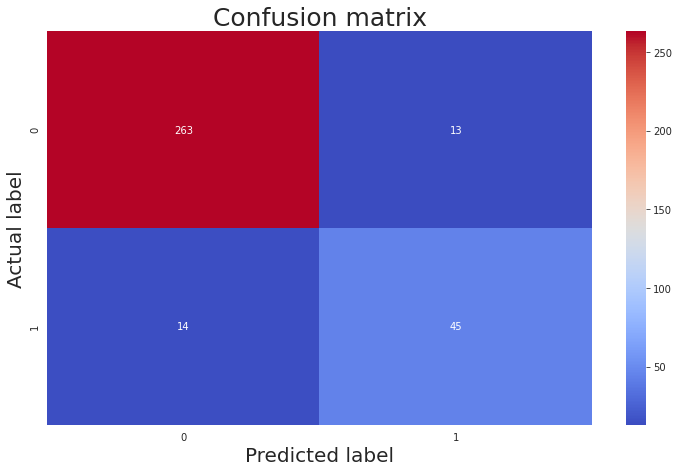

In [ ]:
#Visualizing Confusion Matrix using Heatmap
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(pd.DataFrame(con_max_logistic),cmap="coolwarm", annot=True,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix',fontsize=25)
plt.ylabel('Actual label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)

# Devided our dataset by age 18--29(group1), 30--41(group2), 42--53(group3), 54--64(group4) and predict somker and non-smoker for each age group

In [ ]:
#devided age into four groups. group1:18<=age<=29, group2: 29<age<=41, group3: 41<age<=53,group4: 53<age<=64
df_age_group1=df.loc[df['age']<=29]
df_age_group2=df.loc[(df['age']>29)&(df['age']<=41)]
df_age_group3=df.loc[(df['age']>41)&(df['age']<=53)]
df_age_group4=df.loc[df['age']>53]
df['sex_'] = lb.fit_transform(df['sex']) 
df['smoker_'] = lb.fit_transform(df['smoker'] )
df['region_'] = lb.fit_transform(df['region'] )

# Logistic Regression predict smoke and non-somker for age between 18 and 29

In [ ]:
df_age_group1.head(2)

,age,sex,bmi,children,smoker,region,charges,sex_,smoker_,region_
0,19,female,27.90,0,yes,southwest,16884.9240,0,1,3
1,18,male,33.77,1,no,southeast,1725.5523,1,0,2


In [ ]:
X_group1=df_age_group1[['age','bmi','children','charges','sex_','region_']]
y_group1=df_age_group1['smoker_']

In [ ]:
X_group1_train,X_group1_test,y_group1_train,y_group1_test=train_test_split(X_group1,y_group1,random_state=101)

In [ ]:
# fit the data into model and make predictions
logmodel=LogisticRegression()
logmodel.fit(X_group1_train,y_group1_train)
predictions_group1=logmodel.predict(X_group1_test)

In [ ]:
#print classification report
print(classification_report(y_group1_test,predictions_group1))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        85
           1       0.65      0.55      0.59        20

    accuracy                           0.86       105
   macro avg       0.77      0.74      0.75       105
weighted avg       0.85      0.86      0.85       105



In [ ]:
#print confusion matrix
con_max_group1=confusion_matrix(y_group1_test,predictions_group1)
print(con_max_group1)

[[79  6]
 [ 9 11]]


Text(0.5, 33.0, 'Predicted label')

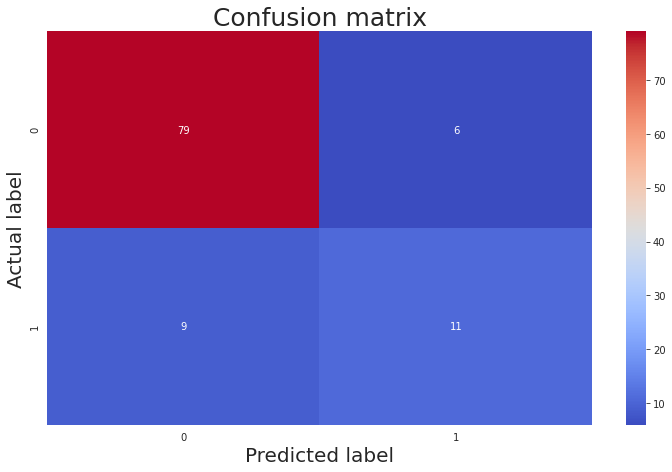

In [ ]:
#Visualizing Confusion Matrix using Heatmap
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(pd.DataFrame(con_max_group1),cmap="coolwarm", annot=True,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix',fontsize=25)
plt.ylabel('Actual label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)

# Logistic Regression predict smoke and non-somker for age between 30 and 41

In [ ]:
X_group2=df_age_group2[['age','bmi','children','charges','sex_','region_']]
y_group2=df_age_group2['smoker_']

In [ ]:
X_group2_train,X_group2_test,y_group2_train,y_group2_test=train_test_split(X_group2,y_group2,random_state=101)

In [ ]:
# fit the data into model and make predictions
logmodel.fit(X_group2_train,y_group2_train)
predictions_group2=logmodel.predict(X_group2_test)

In [ ]:
#print classification report
print(classification_report(y_group2_test,predictions_group2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        57
           1       0.95      0.95      0.95        21

    accuracy                           0.97        78
   macro avg       0.97      0.97      0.97        78
weighted avg       0.97      0.97      0.97        78



In [ ]:
#print confusion matrix
con_max_group2=confusion_matrix(y_group2_test,predictions_group2)
print(con_max_group2)

[[56  1]
 [ 1 20]]


Text(0.5, 33.0, 'Predicted label')

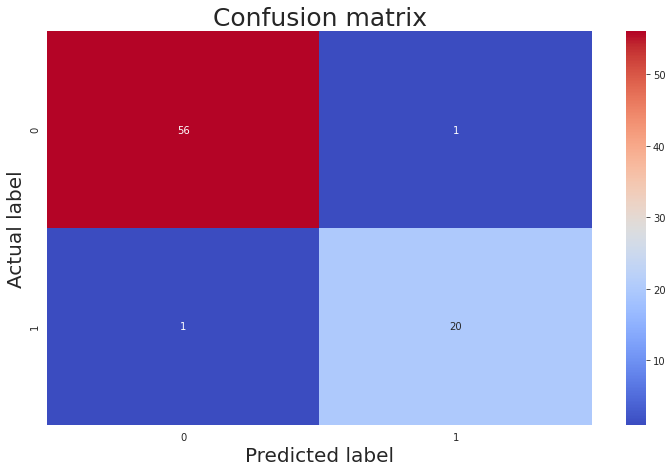

In [ ]:
#Visualizing Confusion Matrix using Heatmap
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(pd.DataFrame(con_max_group2),cmap="coolwarm", annot=True,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix',fontsize=25)
plt.ylabel('Actual label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)

# Logistic Regression predict smoke and non-somker for age 42 to 53

In [ ]:
X_group3=df_age_group3[['age','bmi','children','charges','sex_','region_']]
y_group3=df_age_group3['smoker_']

In [ ]:
X_group3_train,X_group3_test,y_group3_train,y_group3_test=train_test_split(X_group3,y_group3,random_state=101)

In [ ]:
# fit the data into model and make predictions
logmodel.fit(X_group3_train,y_group3_train)
predictions_group3=logmodel.predict(X_group3_test)

In [ ]:
#print classification report
print(classification_report(y_group3_test,predictions_group3))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.90      1.00      0.95        19

    accuracy                           0.98        85
   macro avg       0.95      0.98      0.97        85
weighted avg       0.98      0.98      0.98        85



In [ ]:
#print confusion matrix
con_max_group3=confusion_matrix(y_group3_test,predictions_group3)
print(con_max_group3)

[[64  2]
 [ 0 19]]


Text(0.5, 33.0, 'Predicted label')

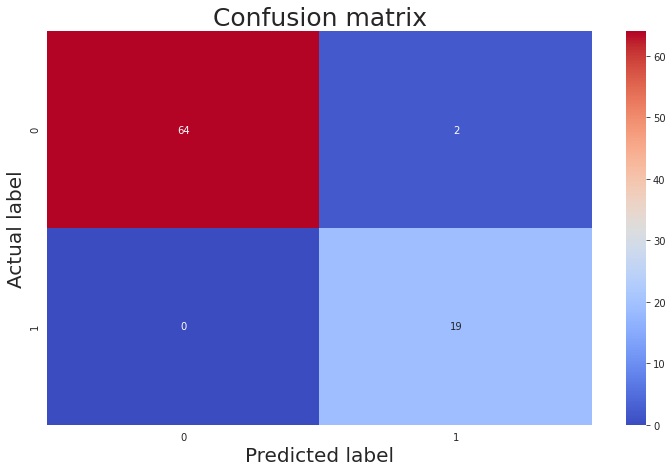

In [ ]:
#Visualizing Confusion Matrix using Heatmap
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(pd.DataFrame(con_max_group3),cmap="coolwarm", annot=True,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix',fontsize=25)
plt.ylabel('Actual label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)

# Logistic Regression predict smoke and non-somker for age between 54--64

In [ ]:
X_group4=df_age_group3[['age','bmi','children','charges','sex_','region_']]
y_group4=df_age_group3['smoker_']

In [ ]:
X_group4_train,X_group4_test,y_group4_train,y_group4_test=train_test_split(X_group4,y_group4,random_state=101)

In [ ]:
# fit the data into model and make predictions
logmodel.fit(X_group4_train,y_group4_train)
predictions_group4=logmodel.predict(X_group4_test)

In [ ]:
#print classification report
print(classification_report(y_group4_test,predictions_group4))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        66
           1       0.90      1.00      0.95        19

    accuracy                           0.98        85
   macro avg       0.95      0.98      0.97        85
weighted avg       0.98      0.98      0.98        85



In [ ]:
#print confusion matrix
con_max_group4=confusion_matrix(y_group4_test,predictions_group4)
print(con_max_group4)

[[64  2]
 [ 0 19]]


Text(0.5, 33.0, 'Predicted label')

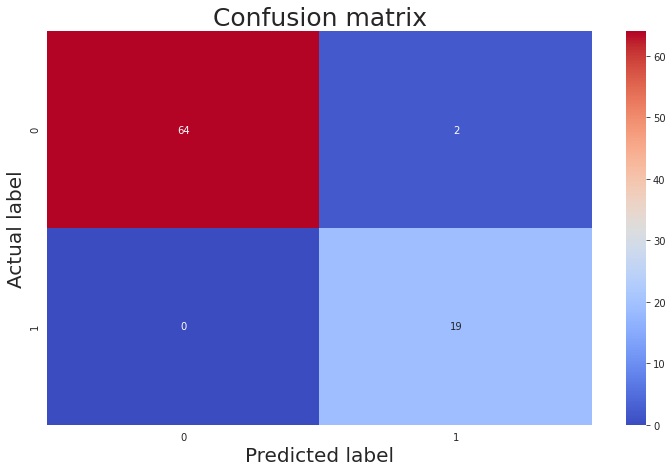

In [ ]:
#Visualizing Confusion Matrix using Heatmap
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(pd.DataFrame(con_max_group4),cmap="coolwarm", annot=True,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix',fontsize=25)
plt.ylabel('Actual label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)

# Observation
Our model is more accuracy for clients' age over 30 years old. 
We hope to have type2 error as less as possible in our predictions, in order to portect the insurence company's profit

# RandomForest classifier predict smoker and non-smoker

In [ ]:
rfc=RandomForestClassifier()

# Use GridSearchCV to find the best parameter

In [ ]:
parameters={'n_estimators':[20,40,80,100,120,150,200]}

In [ ]:
#use GridSearchCV to find the best parameter
grid=GridSearchCV(rfc,param_grid=parameters,scoring='accuracy',cv=10)

In [ ]:
#fit our data into model
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
#get the best score
accuracy=grid.best_score_

In [ ]:
#print the best score
accuracy

0.9661485148514851

In [ ]:
# best parameters
grid.best_params_

{'n_estimators': 120}

RandomForest Classifier with the parameter n_estimators=120 has the highest accuracy. SO, we will use this model to predict smokers and non-smokers

In [ ]:
#fit data into our selected model
rfc_120=RandomForestClassifier(n_estimators=120)
rfc_120.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#make predictions
rfc_120_pred=rfc_120.predict(X_test)

In [ ]:
#print classification report
print(classification_report(y_test,rfc_120_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       276
           1       0.84      0.98      0.91        59

    accuracy                           0.96       335
   macro avg       0.92      0.97      0.94       335
weighted avg       0.97      0.96      0.97       335



In [ ]:
#print confusion matrix
con_max_rfc=confusion_matrix(y_test,rfc_120_pred)
print(con_max_rfc)

[[265  11]
 [  1  58]]


Text(0.5, 33.0, 'Predicted label')

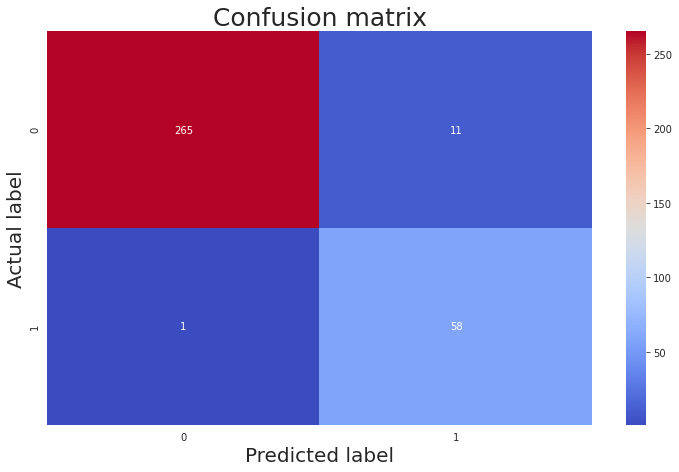

In [ ]:
#Visualizing Confusion Matrix using Heatmap
sns.heatmap(pd.DataFrame(con_max_rfc),cmap="coolwarm", annot=True,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix',fontsize=25)
plt.ylabel('Actual label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)

# Observation:
The accuracy of our model is 0.96, and the model made only one type2 error, which means our model is very reliable when used to predic smokers and non-smokers.And this model wil protect insurence company's profit to a large extent.

# Arbitrary value prediction

In [ ]:
#make five arbitrary records
df_client=pd.DataFrame({'age':[35,20,25,45,55],'bmi':[29.432,22.500,35.438,40.225,42.443],'children':[2,0,1,2,3],'sex_':[1,0,0,1,1],
                     'smoker_':[0,0,0,0,0],'region_':[3,0,1,2,1],'charges':[23876.34563,17899.76538,5033.24678,2630.34578,1345.87623]})

In [ ]:
#print the five arbitrary records
df_client

,age,bmi,children,sex_,smoker_,region_,charges
0,35,29.432,2,1,0,3,23876.34563
1,20,22.500,0,0,0,0,17899.76538
2,25,35.438,1,0,0,1,5033.24678
3,45,40.225,2,1,0,2,2630.34578
4,55,42.443,3,1,0,1,1345.87623


In [ ]:
X_client=df_client[['age','bmi','children','charges','sex_','region_']]
y_client=df['smoker_']

In [ ]:
#make predictions use selected model
smoker_pred=rfc_120.predict(X_client)

In [ ]:
#print predictions
smoker_pred

array([1, 1, 0, 0, 0])

In [ ]:
#print predictions as dataframe
smoker_pred=pd.DataFrame({'smoker_pred':smoker_pred})

In [ ]:
smoker_pred

,smoker_pred
0,1
1,1
2,0
3,0
4,0


# Observation
According to our model, two clients who were documented as non-smokers were tested as smokers. In this case, clients may not be honest about providing their smoke information. 